In [13]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import heapq
from scipy.stats import mode
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



In [26]:
#loading data into numpy array
mnist = datasets.load_digits()
label=np.array(mnist.target)
label = np.reshape(label,(label.size,1))
mnist = np.array(mnist.data)
#adding the labels
mnist=np.append(mnist,label,axis=1)
#shuffling the data for better distibution
np.random.shuffle(mnist)


In [41]:
# spliting the data to  70% train, 20% valiodation, 10% test
train = mnist[0:int(0.7*len(mnist)), :]
validation = mnist[int(0.7*len(mnist)):int(0.9*len(mnist)), :]
test = mnist[int(0.9*len(mnist)): , :]

In [16]:
#defining distances for KNN
def manhatan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

def euclidean_distance(v1, v2):
    return np.sqrt(np.sum(np.square(v1 - v2)))

def chebyshev_distance(v1,v2):
  return np.abs(v1-v2).max()

In [17]:
#predict the label of a row !!!target row contains a label
def predict_knn(train_data,k,distance,target):
  data = train_data[:, 0:-1]
  result = []
  result_k = []
  result_rows = []
  #calculate result according to input function
  for i in range(len(data)):
    if distance=="manhatan":
      result.append(manhatan_distance(data[i], target[0:-1]))
    elif distance=="euclidean":
      result.append(euclidean_distance(data[i], target[0:-1]))
    elif distance=="chebyshev":
      result.append(chebyshev_distance(data[i],target[0:-1]))
  #finding the k smallest distances using heapq
  result_k = heapq.nsmallest(k, range(len(result)),result.__getitem__)
  for i in result_k:
    result_rows.append(train_data[i])
  # result_rows contains the k nearest neighbor of target
  result_rows=np.array(result_rows)
  #predicate label will be the mod of nearest neighbors labels
  predicted_label=mode(result_rows[:,-1])[0][0]
  return predicted_label

finding the best distance function and optimal k-value

In [28]:
#calculate the error value for 3 distance functions and 4 k-values for comparison
distance_function=["euclidean","manhatan","chebyshev"]
k_arr=[3,6,9,12]
test_data=validation
for func in distance_function:
  for k in k_arr:
    correct_prediction=0
    for j in range(len(test_data)):
      row=test_data[j]
      #predicted label
      label=predict_knn(train,k,func,row)
      #row[-1] is the actual label
      if label==row[-1]:
        correct_prediction=correct_prediction+1
    print(correct_prediction)
    print("k: "+str(k)+", "+func+" distance, error: "+ str( ( len(test_data)-correct_prediction )/len(test_data) ) )

357
k: 3, euclidean distance, error: 0.008333333333333333
355
k: 6, euclidean distance, error: 0.013888888888888888
354
k: 9, euclidean distance, error: 0.016666666666666666
354
k: 12, euclidean distance, error: 0.016666666666666666
354
k: 3, manhatan distance, error: 0.016666666666666666
357
k: 6, manhatan distance, error: 0.008333333333333333
357
k: 9, manhatan distance, error: 0.008333333333333333
354
k: 12, manhatan distance, error: 0.016666666666666666
352
k: 3, chebyshev distance, error: 0.022222222222222223
350
k: 6, chebyshev distance, error: 0.027777777777777776
349
k: 9, chebyshev distance, error: 0.030555555555555555
348
k: 12, chebyshev distance, error: 0.03333333333333333


we achieved the least error (0.008) with k=3 and euclidean distance

train error and confusion matrix

In [29]:
train1=train
test1=train
correct_prediction=0
predicted_labels=[]
#finding predicted values for k=3 and euclidean distance for the train data
for i in range(len(test1)):
  row=test1[i]
  label=predict_knn(train1,3,"euclidean",row)
  predicted_labels.append(label)
  if label==row[-1]:
    correct_prediction=correct_prediction+1
error=(len(test1)-correct_prediction)/len(test1)
print("train error: "+str(error))
print(confusion_matrix(test1[:,-1],predicted_labels))


train error: 0.008750994431185362
[[127   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   0   0]
 [  0   0 118   0   0   0   0   0   0   0]
 [  0   0   0 124   0   0   0   0   0   0]
 [  0   0   0   0 134   0   0   0   0   0]
 [  0   0   0   0   0 115   1   0   0   1]
 [  0   0   0   0   0   0 139   0   0   0]
 [  0   0   0   0   0   0   0 112   0   1]
 [  0   3   0   0   0   0   0   0 122   0]
 [  0   0   0   2   1   0   0   0   2 127]]


test error and confusion matrix

In [30]:
train1=train
test1=test
correct_prediction=0
predicted_labels=[]
#finding predicted values for k=3 and euclidean distance for the test data
for i in range(len(test1)):
  row=test1[i]
  label=predict_knn(train1,3,"euclidean",row)
  predicted_labels.append(label)
  if label==row[-1]:
    correct_prediction=correct_prediction+1
error=(len(test1)-correct_prediction)/len(test1)
print("test error: "+str(error))
print(confusion_matrix(test1[:,-1],predicted_labels))

test error: 0.016666666666666666
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  1  0  0  1  0 19  0]
 [ 0  1  0  0  0  0  0  0  0 21]]


validation error and confusion matrix

In [31]:
train1=train
test1=validation
correct_prediction=0
predicted_labels=[]
#finding predicted values for k=3 and euclidean distance for the validation data
for i in range(len(test1)):
  row=test1[i]
  label=predict_knn(train1,3,"euclidean",row)
  predicted_labels.append(label)
  if label==row[-1]:
    correct_prediction=correct_prediction+1
error=(len(test1)-correct_prediction)/len(test1)
print("validation error: "+str(error))
print(confusion_matrix(test1[:,-1],predicted_labels))

validation error: 0.008333333333333333
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 25]]


plotting 100 items from the test set

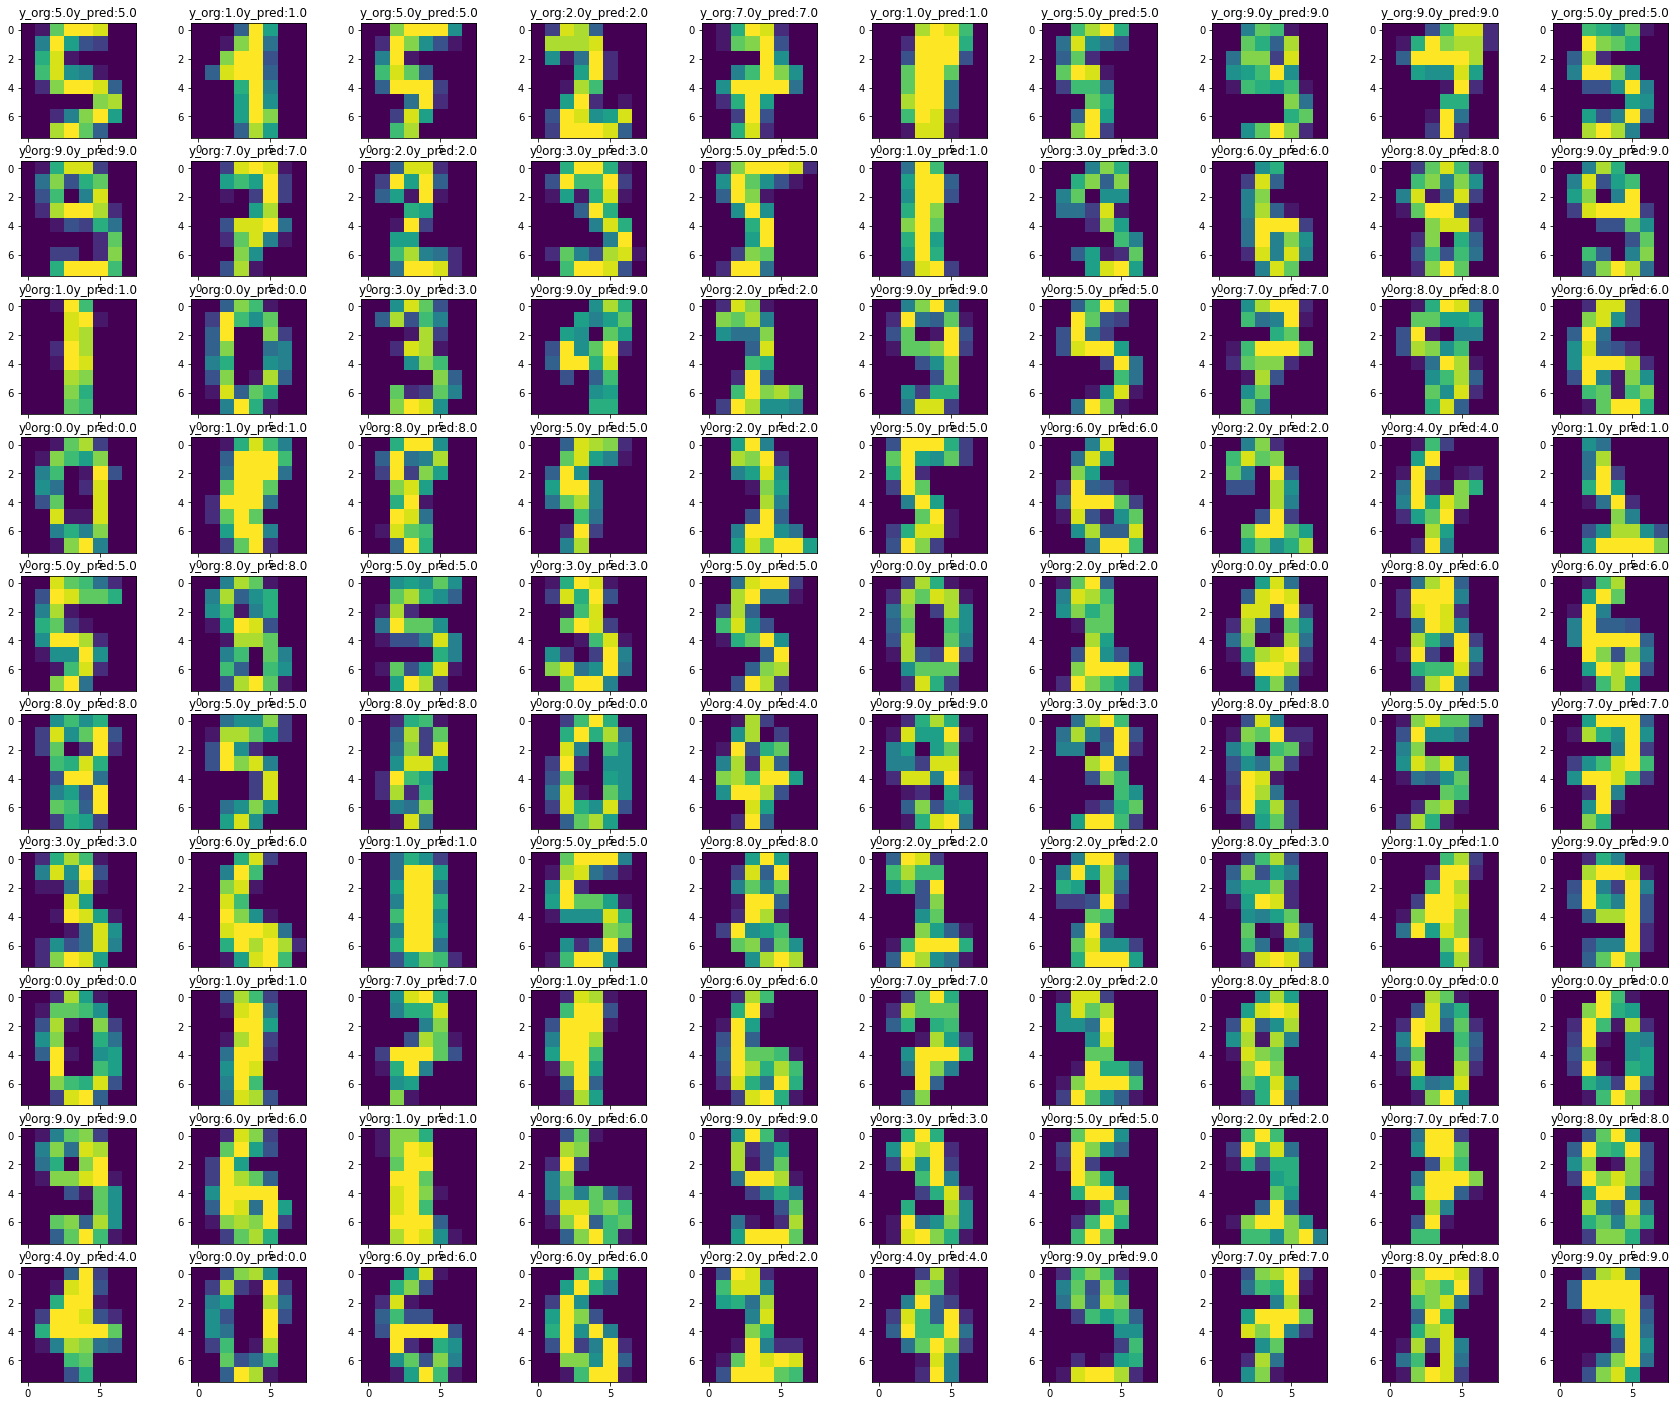

In [32]:
test1 = test[0:100, :]
train1=train
correct_prediction=0
predicted_labels=[]

#finding predicted values for k=3 and euclidean distance for the 100 data selected from test
for i in range(len(test1)):
  row=test1[i]
  label=predict_knn(train1,3,"euclidean",row)
  predicted_labels.append(label)
  if label==row[-1]:
    correct_prediction=correct_prediction+1
#10x10 subplots for 100 images
fig, axis = plt.subplots(10, 10)
column= 0
for i in range(len(test1)):
  #removing the correct labels
  original_label=test[i,-1]
  row_without_label = test1[i, :-1]
  column = column % 10
  axis[int(i/10), column].imshow(row_without_label.reshape(8, 8))
  axis[int(i/10), column].set_title( "y_org:"+ str(original_label)+ "y_pred:" + str(predicted_labels[i]) )
  column=column+1
fig.set_size_inches(30, 25)

plt.show()




# part B: using  sklearn knn classiefier

training the classifier with train data

In [37]:
knn =  KNeighborsClassifier(n_neighbors=3)
X = train[:,:-1]
y = train[:,-1]
knn.fit(X,y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

train error and confusion matrix with sklearn

In [45]:
x_test=train[:,:-1]
y_test=train[:,-1]
correct=0
y_pred=knn.predict(x_test)
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    correct=correct+1
error=(len(y_test)-correct)/len(y_test)
print("train error with sklearn: "+str(error))
print(confusion_matrix(y_test,y_pred))


train error with sklearn: 0.008750994431185362
[[127   0   0   0   0   0   0   0   0   0]
 [  0 128   0   0   0   0   0   0   0   0]
 [  0   0 118   0   0   0   0   0   0   0]
 [  0   0   0 124   0   0   0   0   0   0]
 [  0   0   0   0 134   0   0   0   0   0]
 [  0   0   0   0   0 115   1   0   0   1]
 [  0   0   0   0   0   0 139   0   0   0]
 [  0   0   0   0   0   0   0 112   0   1]
 [  0   3   0   0   0   0   0   0 122   0]
 [  0   0   0   2   1   0   0   0   2 127]]


**confusion matrix and train error are the same with and without sklearn**

test error and confusion matrix with sklearn

In [46]:
x_test=test[:,:-1]
y_test=test[:,-1]
correct=0
y_pred=knn.predict(x_test)
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    correct=correct+1
error=(len(y_test)-correct)/len(y_test)
print("test error with sklearn: "+str(error))
print(confusion_matrix(y_test,y_pred))

test error with sklearn: 0.016666666666666666
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  1  0  0  1  0 19  0]
 [ 0  1  0  0  0  0  0  0  0 21]]


**test error and confusion matrix are the same with and without sklearn**

validation error and confusion matix with sklearn

In [47]:
x_test=validation[:,:-1]
y_test=validation[:,-1]
correct=0
y_pred=knn.predict(x_test)
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    correct=correct+1
error=(len(y_test)-correct)/len(y_test)
print("validation error with sklearn: "+str(error))
print(confusion_matrix(y_test,y_pred))

validation error with sklearn: 0.008333333333333333
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 25]]


**validation error and confusion matrix are the same with and without sklearn**

plotting 100 items predicted using the test set with sklearn

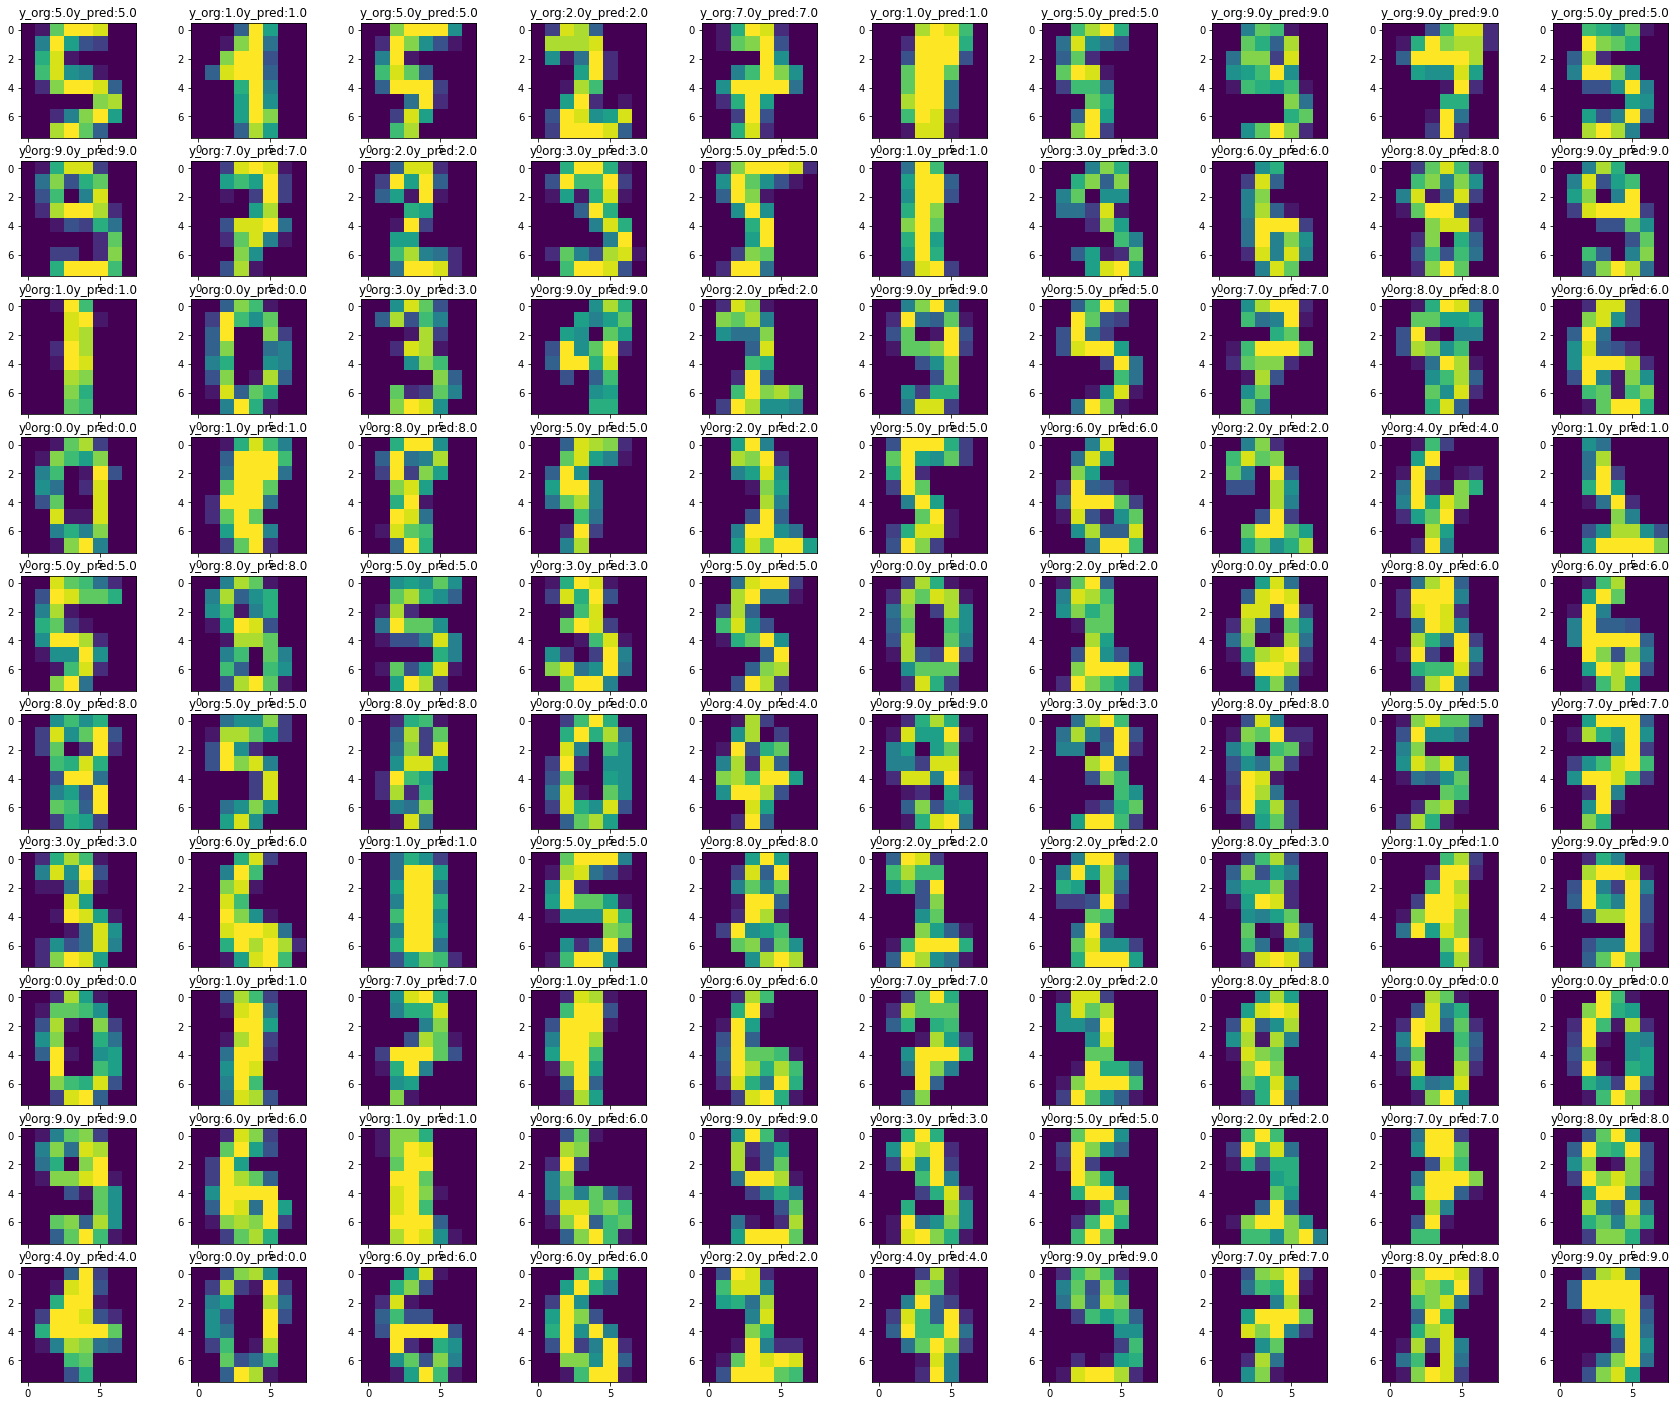

In [48]:
x_test=test[0:100,:-1]
y_test=test[:,-1]

#finding predicted values for k=3 for the 100 data selected from test
y_pred=knn.predict(x_test)
#10x10 subplots for 100 images
fig, axis = plt.subplots(10, 10)
column= 0
for i in range(len(x_test)):
  column = column % 10
  axis[int(i/10), column].imshow(x_test[i].reshape(8, 8))
  axis[int(i/10), column].set_title( "y_org:"+ str(y_test[i])+ "y_pred:" + str(y_pred[i]) )
  column=column+1
fig.set_size_inches(30, 25)

plt.show()